# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()

apinews_key_read = os.getenv("NEWSAPI_KEY")
type(apinews_key_read)

str

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=apinews_key_read)

In [4]:
# Fetch the Bitcoin news articles
fetch_bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)
fetch_bitcoin_news["totalResults"]

4419

In [5]:
# Fetch the Ethereum news articles
fetch_ethereum_news= newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)
fetch_ethereum_news["totalResults"]

1217

In [6]:
# Create the Bitcoin sentiment scores DataFrame
import nltk
nltk.download('vader_lexicon') # update Vader Lexicon

# Initialize VADER sentiment analyzer
analyzer= SentimentIntensityAnalyzer()
bitcoin_sentiments = []



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Trader\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
for article in fetch_bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass

In [8]:
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

#Reorder columns
cols = ["date","text", "compound", "positive","negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [9]:
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.119611,0.060526,0.029000,0.910421
std,0.391383,0.065557,0.066381,0.096570
min,-0.670500,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.000000,0.050000,0.000000,0.947000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.215000,1.000000


In [10]:
articles_bitcoin_df = pd.DataFrame.from_dict(fetch_bitcoin_news["articles"])
articles_bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}","Timothy B. Lee, Ars Technica",An Engineer Gets 9 Years for Stealing $10M Fro...,The defendant tried—and failed—to use bitcoin ...,https://www.wired.com/story/an-engineer-gets-9...,https://media.wired.com/photos/5fac6afb446b463...,2020-11-12T14:00:00Z,A former Microsoft software engineer from Ukra...
1,"{'id': None, 'name': 'Lifehacker.com'}","Mike Winters on Two Cents, shared by Mike Wint...",Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...
2,"{'id': 'engadget', 'name': 'Engadget'}",Karissa Bell,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,https://www.engadget.com/paypal-opens-cryptocu...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-11-12T21:05:41Z,PayPal is bringing its newly-announced support...
3,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/,https://mondrian.mashable.com/2020%252F11%252F...,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,https://www.engadget.com/jd-com-supports-china...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [11]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []
for article in fetch_ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass

ethe_df = pd.DataFrame(ethereum_sentiments)

#Reorder columns
cols = ["date","text", "compound", "positive","negative", "neutral"]
ethe_df = ethe_df[cols]
ethe_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682


In [12]:
ethe_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.153245,0.06430,0.021050,0.914650
std,0.339247,0.07896,0.054473,0.104806
min,-0.493900,0.00000,0.000000,0.672000
25%,0.000000,0.00000,0.000000,0.876000
50%,0.000000,0.06150,0.000000,0.932000
75%,0.430825,0.09525,0.000000,1.000000
max,0.877900,0.31800,0.196000,1.000000


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary
""" This segment is to test the code with one article"""
nltk.download('stopwords')
article_bitcoin = articles_bitcoin_df['content'][1]
#word_tokenize(article)
article_bitcoin

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Trader\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'

In [17]:
token_article_bitcoin = word_tokenize(article_bitcoin)
#token_article_bitcoin

In [18]:
sw = set(stopwords.words('english'))
first_result = [token.lower() for token in token_article_bitcoin if token.lower() not in sw] 
print(first_result)

['visa', 'partnered', 'cryptocurrency', 'startup', 'blockfi', 'offer', 'first', 'rewards', 'credit', 'card', 'pays', 'bitcoin', 'rather', 'cash', ',', 'worth', 'applying', '?', 'unless', 'youre', 'extremely', 'bullish', 'o…', '[', '+2239', 'chars', ']']


In [27]:
# 1) getting rid of Non-alpha characters: Regex
#sentence_bit = sent_tokenize(article_bitcoin)
regex = re.compile("[^a-zA-Z ]")
re_bit_clean = regex.sub('',article_bitcoin)
print(re_bit_clean)
# then 2) remove stopwords from regex_clean sentence

token_article_from_string = word_tokenize(re_bit_clean)
stopword_removed_bit = [token.lower() for token in token_article_from_string if token.lower() not in sw]
print(stopword_removed_bit)

PayPal is bringing its newlyannounced support for cryptocurrency to all US accounts It first announced plans to open cryptocurrency trading to USbased users in October but until now it was only a  chars
['paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'accounts', 'first', 'announced', 'plans', 'open', 'cryptocurrency', 'trading', 'usbased', 'users', 'october', 'chars']


In [28]:
# then 3) lemmatize the words
lemmatizer = WordNetLemmatizer() # instanciate the lemmatizer
final_root = [lemmatizer.lemmatize(word) for word in stopword_removed_bit ]
print(final_root)

['paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'u', 'account', 'first', 'announced', 'plan', 'open', 'cryptocurrency', 'trading', 'usbased', 'user', 'october', 'char']


In [30]:
new_clean = [regex.sub('',word) for word in article_bitcoin ]
"""for word in article_bitcoin:
    reg.sub('', word)"""




"for word in article_bitcoin:\n    reg.sub('', word)"

In [59]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    tokens = []
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    # Convert the words to lowercase
    #sentence = sent_tokenize(text)
    # Remove the punctuation
    #print(text)
    re_clean = regex.sub('',text)
    token_article = word_tokenize(re_clean)
    
    # Remove the stop words
    stopword_removed = [token.lower() for token in token_article if token.lower() not in sw]

    # additional stopwords to remove
    sw_addon = {'char', 'chars'}
    stopwords_removed_addon = [word.lower() for word in stopword_removed if word.lower() not in sw.union(sw_addon) ]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed_addon ]

    return tokens


In [60]:
#test function
article_bitcoin = articles_bitcoin_df['content'][4]
token_list = tokenizer(article_bitcoin)
token_list

['unlike',
 'conventional',
 'cryptocurrencies',
 'central',
 'bank',
 'control',
 'digital',
 'yuan',
 'case',
 'people',
 'bank',
 'china',
 'move',
 'give',
 'country',
 'power',
 'theory',
 'stability',
 'freq']

In [63]:
# Create a new tokens column for bitcoin
"""for index, row in articles_bitcoin_df.iterrows():
    try:
        article_bitcoin = articles_bitcoin_df['content'][row]
        token_list = tokenizer(article_bitcoin)

    except AttributeError:
        pass
#token_list_df = pd.DataFrame(token_list)
articles_bitcoin_df['tokens']=articles_bitcoin_df.apply(lambda row: tokenizer(articles_bitcoin_df['content'][row]), axis=1)
articles_bitcoin_df.head()"""

"for index, row in articles_bitcoin_df.iterrows():\n    try:\n        article_bitcoin = articles_bitcoin_df['content'][row]\n        token_list = tokenizer(article_bitcoin)\n\n    except AttributeError:\n        pass\n#token_list_df = pd.DataFrame(token_list)\narticles_bitcoin_df['tokens']=articles_bitcoin_df.apply(lambda row: tokenizer(articles_bitcoin_df['content'][row]), axis=1)\narticles_bitcoin_df.head()"

In [64]:
article_bitcoin = articles_bitcoin_df['content'][2]
token_list = tokenizer(article_bitcoin)
token_list

['paypal',
 'bringing',
 'newlyannounced',
 'support',
 'cryptocurrency',
 'u',
 'account',
 'first',
 'announced',
 'plan',
 'open',
 'cryptocurrency',
 'trading',
 'usbased',
 'user',
 'october']

In [125]:
"""tokens_2_bit = [tokenizer(articles_bitcoin_df['content'][row]) for row in range(len(articles_bitcoin_df['content']))]
print(tokens_2_bit[:5])"""

"tokens_2_bit = [tokenizer(articles_bitcoin_df['content'][row]) for row in range(len(articles_bitcoin_df['content']))]\nprint(tokens_2_bit[:5])"

In [124]:
"""take_1 = [tokenizer(row) for row in articles_bitcoin_df['content']]
take_1"""

"take_1 = [tokenizer(row) for row in articles_bitcoin_df['content']]\ntake_1"

In [126]:
"""for row in articles_bitcoin_df['content']:
    print(row)
    print("new line")"""

'for row in articles_bitcoin_df[\'content\']:\n    print(row)\n    print("new line")'

In [127]:
"""articles_bitcoin_df['tokens'] = articles_bitcoin_df['content'].apply(tokenizer) """

"articles_bitcoin_df['tokens'] = articles_bitcoin_df['content'].apply(tokenizer) "

In [128]:
"""def apply_tokenizer(x): 
    return tokenizer(x)

articles_bitcoin_df['tokens']= articles_bitcoin_df.apply(apply_tokenizer, axis=1)"""

"def apply_tokenizer(x): \n    return tokenizer(x)\n\narticles_bitcoin_df['tokens']= articles_bitcoin_df.apply(apply_tokenizer, axis=1)"

In [129]:
"""content_column_single = articles_bitcoin_df['content']
tokenized_content = content_column_single.apply(tokenizer)
tokenized_content"""

"content_column_single = articles_bitcoin_df['content']\ntokenized_content = content_column_single.apply(tokenizer)\ntokenized_content"

In [130]:
""" Attempt number 55
cleaning the data before running the function"""

articles_bit_df_clean = articles_bitcoin_df.dropna()
content_column_single = articles_bit_df_clean['content']
tokenized_content = content_column_single.apply(tokenizer)
tokenized_content

0     [former, microsoft, software, engineer, ukrain...
1     [visahas, partnered, cryptocurrency, startup, ...
2     [paypal, bringing, newlyannounced, support, cr...
3     [november, absolutely, massive, twomonth, rall...
4     [unlike, conventional, cryptocurrencies, centr...
5     [youve, watching, crypto, market, past, week, ...
6     [decentralized, exchange, protocol, allow, cry...
8     [u, market, ended, november, large, gain, even...
9     [maisie, williams, also, known, arya, stark, d...
10    [billion, transaction, flowed, dormant, bitcoi...
11    [poster, participatinga, former, microsoft, so...
12    [poster, participatingbitcoin, rose, tuesday, ...
14    [justin, harperbusiness, reporter, bbc, newsim...
15    [posted, bitcoin, grabbed, headline, week, asc...
16    [reuters, stafffile, photo, representation, vi...
17    [reuters, stafffile, photo, representation, vi...
18    [reuters, stafffile, photo, representation, vi...
19    [london, reuters, digital, currency, ether

In [131]:
# Create a new tokens column for bitcoin df
articles_bit_df_clean['tokens'] = tokenized_content
articles_bit_df_clean.head()

,source,author,title,description,url,urlToImage,publishedAt,content,tokens
0,"{'id': 'wired', 'name': 'Wired'}","Timothy B. Lee, Ars Technica",An Engineer Gets 9 Years for Stealing $10M Fro...,The defendant tried—and failed—to use bitcoin ...,https://www.wired.com/story/an-engineer-gets-9...,https://media.wired.com/photos/5fac6afb446b463...,2020-11-12T14:00:00Z,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,"{'id': None, 'name': 'Lifehacker.com'}","Mike Winters on Two Cents, shared by Mike Wint...",Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
2,"{'id': 'engadget', 'name': 'Engadget'}",Karissa Bell,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,https://www.engadget.com/paypal-opens-cryptocu...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-11-12T21:05:41Z,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/,https://mondrian.mashable.com/2020%252F11%252F...,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,https://www.engadget.com/jd-com-supports-china...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [132]:
bitcoin_df['tokens'] = tokenized_content
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [133]:
# Create a new tokens column for ethereum
ethe_df.isnull().sum()

date        0
text        0
compound    0
positive    0
negative    0
neutral     0
tokens      0
dtype: int64

In [134]:
column_single_ethe = ethe_df['text']
column_single_ethe.head()

0    PayPal is bringing its newly-announced support...
1    FILE PHOTO: Representation of the Ethereum vir...
2    FILE PHOTO: Representation of the Ethereum vir...
3    LONDON (Reuters) - Digital currencies Ethereum...
4    PayPal has launched the Generosity Network, a ...
Name: text, dtype: object

In [135]:
tokenized_ethe_text = column_single_ethe.apply(tokenizer)
tokenized_ethe_text.head()

0    [paypal, bringing, newlyannounced, support, cr...
1    [file, photo, representation, ethereum, virtua...
2    [file, photo, representation, ethereum, virtua...
3    [london, reuters, digital, currency, ethereum,...
4    [paypal, launched, generosity, network, platfo...
Name: text, dtype: object

---

In [136]:
ethe_df['tokens'] = tokenized_ethe_text
ethe_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682,"[paypal, launched, generosity, network, platfo..."


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [137]:
from collections import Counter
from nltk import ngrams

In [138]:
# Generate the Bitcoin N-grams where N=2
# To generate NGrams I need to join all the strings first (text) and then 
# pass the tokenizer function through the newly generated big_string
""" I had to do that because my tokens column consist of a list of tokens
which can not be processed by ngrams function"""
big_string_bit = ' '.join(bitcoin_df['text'])
big_string_bit_clean = tokenizer(big_string_bit)
bigrams = ngrams(big_string_bit_clean, n=2)
top_bigrams = dict(Counter(bigrams).most_common(10))
top_bigrams

{('photo', 'representation'): 5,
 ('virtual', 'currency'): 5,
 ('representation', 'virtual'): 4,
 ('currency', 'bitcoin'): 4,
 ('illustration', 'taken'): 4,
 ('reuters', 'stafffile'): 3,
 ('stafffile', 'photo'): 3,
 ('former', 'microsoft'): 2,
 ('microsoft', 'software'): 2,
 ('software', 'engineer'): 2}

In [145]:
# Generate the Ethereum N-grams where N=2
big_string_ethe = ' '.join(ethe_df['text'])

big_string_ethe_clean = tokenizer(big_string_ethe)

sw_addon_ethe = {'char', 'chars', 'bitcoin'}
ethere_removed_xtra_addon = [word.lower() for word in big_string_ethe_clean if word.lower() not in sw.union(sw_addon_ethe) ]
#print(ethere_removed_xtra_addon)
bigrams_ethe = ngrams(ethere_removed_xtra_addon, n=2)
top_bigrams_ethe = dict(Counter(bigrams_ethe).most_common(10))
top_bigrams_ethe

{('virtual', 'currency'): 9,
 ('photo', 'representation'): 7,
 ('representation', 'virtual'): 6,
 ('illustration', 'taken'): 6,
 ('seen', 'illustration'): 5,
 ('currency', 'seen'): 5,
 ('taken', 'november'): 5,
 ('november', 'reutersdado'): 5,
 ('reuters', 'stafffile'): 4,
 ('stafffile', 'photo'): 4}

In [146]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [147]:
# Get the top 10 words for Bitcoin
top_10_bitcoin = token_count(big_string_bit_clean)
top_10_bitcoin

[('bitcoin', 12),
 ('currency', 7),
 ('reuters', 7),
 ('cryptocurrency', 5),
 ('photo', 5),
 ('representation', 5),
 ('virtual', 5),
 ('taken', 5),
 ('u', 4),
 ('november', 4)]

In [148]:
# Get the top 10 words for Ethereum
top_10_ethereum = token_count(ethere_removed_xtra_addon)
top_10_ethereum

[('reuters', 13),
 ('currency', 10),
 ('photo', 9),
 ('representation', 9),
 ('virtual', 9),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7),
 ('taken', 7),
 ('ethereum', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

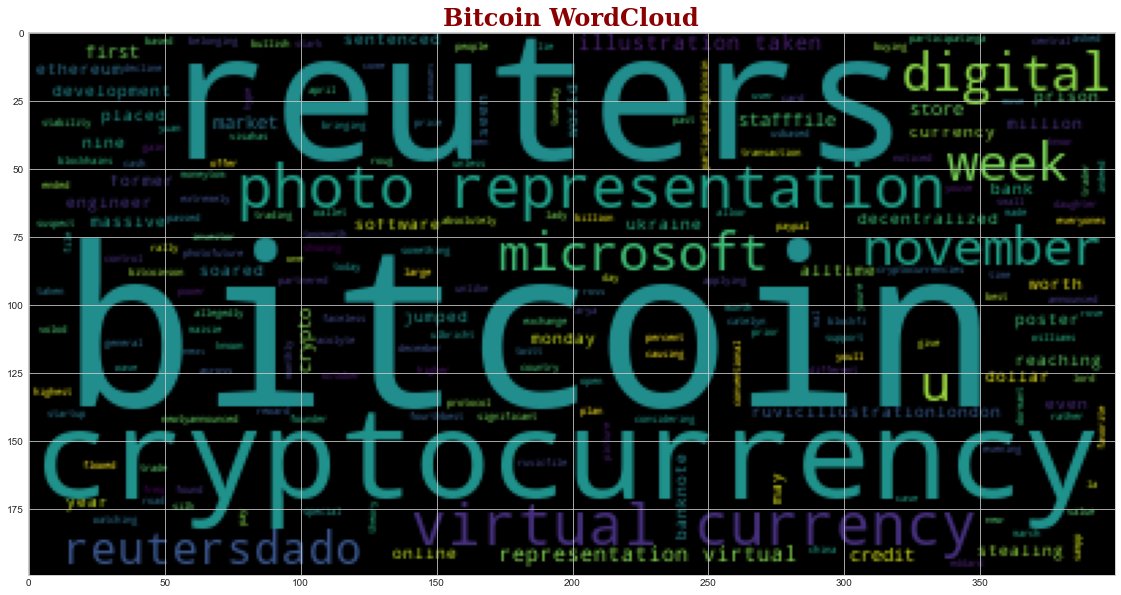

In [175]:
# Generate the Bitcoin word cloud
join_clean_tokens_bit = ' '.join(big_string_bit_clean)

wc = WordCloud().generate(join_clean_tokens_bit)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 24,
        }
plt.title("Bitcoin WordCloud",fontdict=font)
plt.imshow(wc)

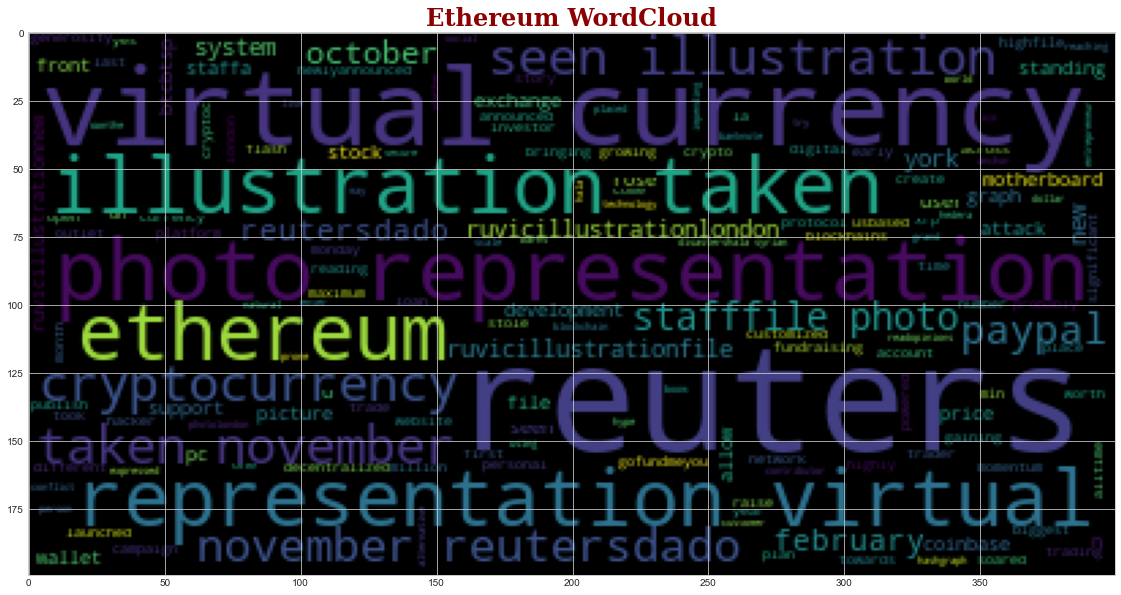

In [176]:
# Generate the Ethereum word cloud
# removed bitcoin from text to avoid bitcoin word from showing oup in the ethereum cloud
join_clean_tokens_ethe = ' '.join(ethere_removed_xtra_addon)

wc_ethe = WordCloud().generate(join_clean_tokens_ethe)
plt.title("Ethereum WordCloud",fontdict=font)
plt.imshow(wc_ethe)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [152]:
import spacy
from spacy import displacy

In [153]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [154]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [155]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
join_clean_tokens_bit

'former microsoft software engineer ukraine sentenced nine year prison stealing million store credit microsofts online store volod visahas partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish paypal bringing newlyannounced support cryptocurrency u account first announced plan open cryptocurrency trading usbased user october november absolutely massive twomonth rally bitcoin passed first time next day soared even higher reaching price roug unlike conventional cryptocurrencies central bank control digital yuan case people bank china move give country power theory stability freq youve watching crypto market past week youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal decentralized exchange protocol allow crypto trader investor trade across different blockhains development significant new development come la u market ended november large

In [177]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc=nlp(join_clean_tokens_bit)
doc.user_data["title"] = " Bitcoin Name Entity Recognition"

# Add a title to the document
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [158]:
# Render the visualization
# YOUR CODE HERE!
spacy.explain("GPE")

'Countries, cities, states'

In [163]:
# List all Entities
# YOUR CODE HERE!
print(f" List of entities recognized for bitcoin dataframe: {[ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]}")

 List of entities recognized for bitcoin dataframe: ['microsoft', 'ukraine', 'bitcoin', 'central bank', 'digital yuan', 'bitcoin', 'hype lie general mal decentralized exchange', 'crypto', 'microsoft', 'ukraine', 'highthe digital cur posted bitcoin grabbed', 'reutersdado ruvicillustrationtokyo', 'reuters bitcoin', 'reuters', 'reuters', 'london']


---

## Ethereum NER

In [165]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!

join_clean_tokens_ethe

'paypal bringing newlyannounced support cryptocurrency u account first announced plan open cryptocurrency trading usbased user october file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationlondon reuters file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationlondon reuters london reuters digital currency ethereum xrp soared monday gaining momentum powered towards alltime highfile photo representation ethereum virtual currency paypal launched generosity network platform allows user create customized personal fundraising campaign yes like gofundmeyou raise maximum reuters stafffile photo representation virtual currency seen front stock graph illustration taken november reutersdado ruvicillustrationfile photo reuters stafffile photo representation virtual currency seen front stock graph illustration taken november reuter

In [167]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_ethe=nlp(join_clean_tokens_ethe)
doc_ethe.user_data["title"] = " Ethereum Name Entity Recognition"

# Add a title to the document
# YOUR CODE HERE!

In [168]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_ethe, style='ent')

In [170]:
# List all Entities
# YOUR CODE HERE!
print(f" List of entities recognized for ethereum dataframe: {[ent.text for ent in doc_ethe.ents if ent.label_ in ['GPE', 'ORG']]}")

 List of entities recognized for ethereum dataframe: ['reutersdado ruvicillustrationlondon reuters', 'reutersdado ruvicillustrationlondon', 'london', 'reuters', 'new york', 'un decentralized exchange', 'min', 'reuters', 'reutersdado ruvicillustrationnew york', 'reutersdado ruvicillustrationnew york', 'reuters', 'hedera', 'sunnyvale', 'california']
